In [2]:
import pandas as pd
import os
import re
import datetime
import matplotlib
from matplotlib import pyplot as plt

%pylab inline

pd.options.display.max_rows = 4000

os.chdir("C:/Users/YJ/Documents/1) Learning/Udacity - Machine Learning/capstone/Submission")

data = pd.read_hdf("DJUSTC Prices and Ratios.h5","Output")
data.index = data.date
data=data.drop("date",axis=1)

Populating the interactive namespace from numpy and matplotlib


In [4]:
pivot= data.pivot_table(index=data.index,columns=data.ticker)
pivot.columns.names = ['data_types','tickers']

In [5]:
print('The size of the pivoted dataframe is', pivot.shape)
print('The range of the index is from ',pivot.index[0]," to ",pivot.index[-1])
print('The columns consist of ',len(pivot.columns.names),' levels which is ',pivot.columns.names)
print('There are ',len(pivot.columns.get_level_values('data_types').unique())," different data types for each of the ", 
     len(pivot.columns.get_level_values('tickers').unique()), " unique tickers.")

The size of the pivoted dataframe is (1500, 2455)
The range of the index is from  2012-06-29 00:00:00  to  2018-06-15 00:00:00
The columns consist of  2  levels which is  ['data_types', 'tickers']
There are  20  different data types for each of the  131  unique tickers.


In [6]:
print('A quick glimpse of the data')
pivot.head()

A quick glimpse of the data


data_types Book_Value_Per_Share_*_USD                                          \
tickers                          AABA   AAPL  ACIW   ADBE    ADI  ADSK   AKAM   
date                                                                            
2012-06-29                      13.06  16.99  4.52  13.49  13.94  8.34  13.19   
2012-07-02                      13.06  16.99  4.52  13.49  13.94  8.34  13.19   
2012-07-03                      13.06  16.99  4.52  13.49  13.94  8.34  13.19   
2012-07-05                      13.06  16.99  4.52  13.49  13.94  8.34  13.19   
2012-07-06                      13.06  16.99  4.52  13.49  13.94  8.34  13.19   

data_types                     ...         volume                        \
tickers     AMAT   AMD ANET    ...           VRSN       VSAT        VSM   
date                           ...                                        
2012-06-29  6.04  0.75  NaN    ...       756467.0   756467.0   756467.0   
2012-07-02  6.04  0.75  NaN    ...      1182600.0  1182600.0  1182600.0   
2012-07-03  6.04  0.75  NaN    ...       900667.0   900667.0   900667.0   
2012-07-05  6.04  0.75  NaN    ...      1151800.0  1151800.0  1151800.0   
2012-07-06  6.04  0.75  NaN    ...       645267.0   645267.0   645267.0   

data_types                                                                    \
tickers          WDAY        WDC         WP       XLNX          Z       ZAYO   
date                                                                           
2012-06-29   756467.0   756467.0   756467.0   756467.0   756467.0   756467.0   
2012-07-02  1182600.0  1182600.0  1182600.0  1182600.0  1182600.0  1182600.0   
2012-07-03   900667.0   900667.0   900667.0   900667.0   900667.0   900667.0   
2012-07-05  1151800.0  1151800.0  1151800.0  1151800.0  1151800.0  1151800.0   
2012-07-06   645267.0   645267.0   645267.0   645267.0   645267.0   645267.0   

data_types             
tickers            ZG  
date                   
2012-06-29   756467.0  
2012-07-02  1182600.0  
2012-07-03   900667.0  
2012-07-05  1151800.0  
2012-07-06   645267.0  

[5 rows x 2455 columns]

In [7]:
total = pivot.isnull().sum().sort_values(ascending = False)
percent = (pivot.isnull().sum()/pivot.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total    Percent
data_types                     tickers                  
Book_Value_Per_Share_*_USD     VMW       1385  92.333333
Shares_Mil                     DVMT      1385  92.333333
Operating_Income_USD_Mil       DVMT      1385  92.333333
Gross_Margin_%                 DVMT      1385  92.333333
Net_Income_USD_Mil             DVMT      1385  92.333333
Revenue_USD_Mil                DVMT      1385  92.333333
Earnings_Per_Share_USD         DVMT      1385  92.333333
Free_Cash_Flow_Per_Share_*_USD VMW       1385  92.333333
Operating_Margin_%             DVMT      1385  92.333333
Book_Value_Per_Share_*_USD     DY        1385  92.333333
                               DVMT      1385  92.333333
Payout_Ratio_%_*               LDOS      1134  75.600000
Dividends_USD                  VSM       1134  75.600000
Payout_Ratio_%_*               VSM       1134  75.600000
Dividends_USD                  CTSH      1134  75.600000
Payout_Ratio_%_*               CTSH      1134  75.600000
Free_Cash_Flow_Per_Share_*_USD LITE       997  66.466667
                               VSM        997  66.466667
                               LDOS       997  66.466667
Book_Value_Per_Share_*_USD     LDOS       882  58.800000

In [8]:
print("We have ",len(pivot.columns.names)," levels in columns")
print("The levels are ",pivot.columns.names)
for level in pivot.columns.names:
    print("\n There are ",len(pivot.columns.get_level_values(level).unique()), " unique values in ", level)
    print("\n ",level, " has the following unique values: \n", pivot.columns.get_level_values(level).unique())

print("**************************************************************************************")
    
print("We have ",len(pivot.index.names)," level in index")
print("The levels are ",pivot.index.names)
for level in pivot.index.names:
    print("\n There are ",len(pivot.index.get_level_values(level).unique()), " unique values in ", level)
    print("\n ",level, " has the following unique values: \n", pivot.index.get_level_values(level).unique())


We have  2  levels in columns
The levels are  ['data_types', 'tickers']

 There are  20  unique values in  data_types

  data_types  has the following unique values: 
 Index(['Book_Value_Per_Share_*_USD', 'Cap_Spending_USD_Mil', 'Dividends_USD',
       'Earnings_Per_Share_USD', 'Free_Cash_Flow_Per_Share_*_USD',
       'Free_Cash_Flow_USD_Mil', 'Gross_Margin_%', 'Net_Income_USD_Mil',
       'Operating_Cash_Flow_USD_Mil', 'Operating_Income_USD_Mil',
       'Operating_Margin_%', 'Payout_Ratio_%_*', 'Revenue_USD_Mil',
       'Shares_Mil', 'Working_Capital_USD_Mil', 'close', 'high', 'low', 'open',
       'volume'],
      dtype='object', name='data_types')

 There are  131  unique values in  tickers

  tickers  has the following unique values: 
 Index(['AABA', 'AAPL', 'ACIW', 'ADBE', 'ADI', 'ADSK', 'AKAM', 'AMAT', 'AMD',
       'ANET',
       ...
       'VRSN', 'VSAT', 'VSM', 'WDAY', 'WDC', 'WP', 'XLNX', 'Z', 'ZAYO', 'ZG'],
      dtype='object', name='tickers', length=131)
******************

In [9]:
print("We have ",len(pivot.columns.names)," levels in columns")
print("The levels are ",pivot.columns.names)
for level in pivot.columns.names:
    print("\n There are ",len(pivot.columns.get_level_values(level).unique()), " in ", level)
    print("\n ",level, " has the following unique values: \n", pivot.columns.get_level_values(level).unique())

print("**************************************************************************************")
    
print("We have ",len(pivot.index.names)," level in index")
print("The levels are ",pivot.index.names)
for level in pivot.index.names:
    print("\n There are ",len(pivot.index.get_level_values(level).unique()), " in ", level)
    print("\n ",level, " has the following unique values: \n", pivot.index.get_level_values(level).unique())


We have  2  levels in columns
The levels are  ['data_types', 'tickers']

 There are  20  in  data_types

  data_types  has the following unique values: 
 Index(['Book_Value_Per_Share_*_USD', 'Cap_Spending_USD_Mil', 'Dividends_USD',
       'Earnings_Per_Share_USD', 'Free_Cash_Flow_Per_Share_*_USD',
       'Free_Cash_Flow_USD_Mil', 'Gross_Margin_%', 'Net_Income_USD_Mil',
       'Operating_Cash_Flow_USD_Mil', 'Operating_Income_USD_Mil',
       'Operating_Margin_%', 'Payout_Ratio_%_*', 'Revenue_USD_Mil',
       'Shares_Mil', 'Working_Capital_USD_Mil', 'close', 'high', 'low', 'open',
       'volume'],
      dtype='object', name='data_types')

 There are  131  in  tickers

  tickers  has the following unique values: 
 Index(['AABA', 'AAPL', 'ACIW', 'ADBE', 'ADI', 'ADSK', 'AKAM', 'AMAT', 'AMD',
       'ANET',
       ...
       'VRSN', 'VSAT', 'VSM', 'WDAY', 'WDC', 'WP', 'XLNX', 'Z', 'ZAYO', 'ZG'],
      dtype='object', name='tickers', length=131)
**********************************************

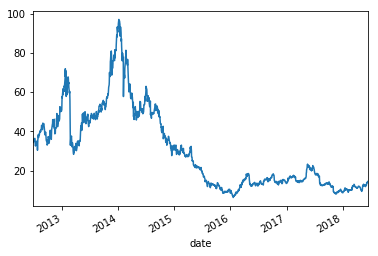

In [10]:
pivot.xs('open',axis=1,level=0).xs("AAPL",axis=1).plot()

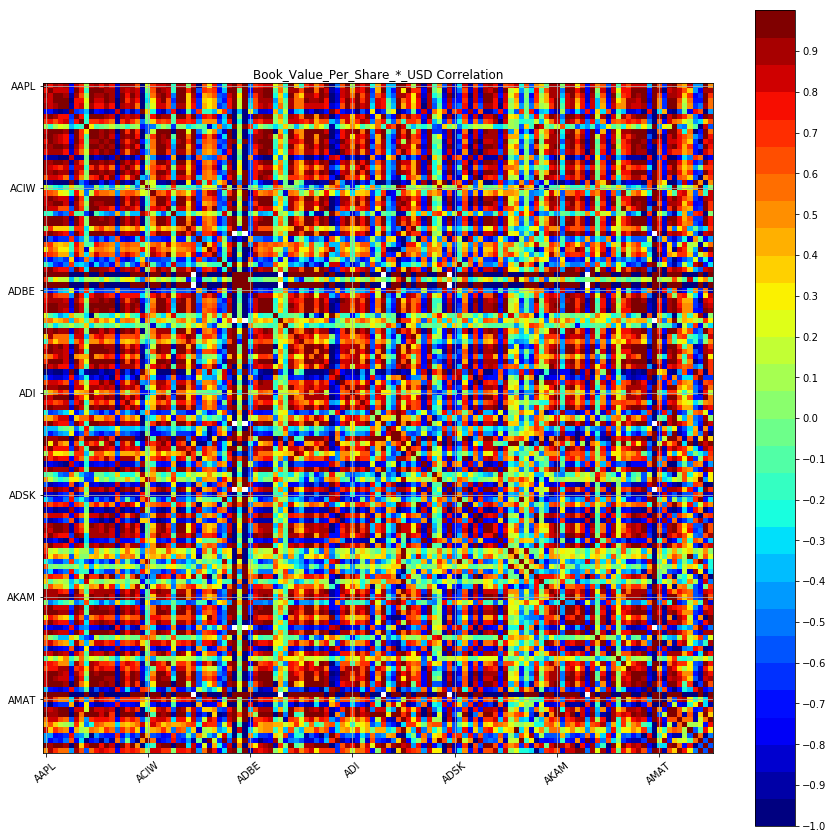

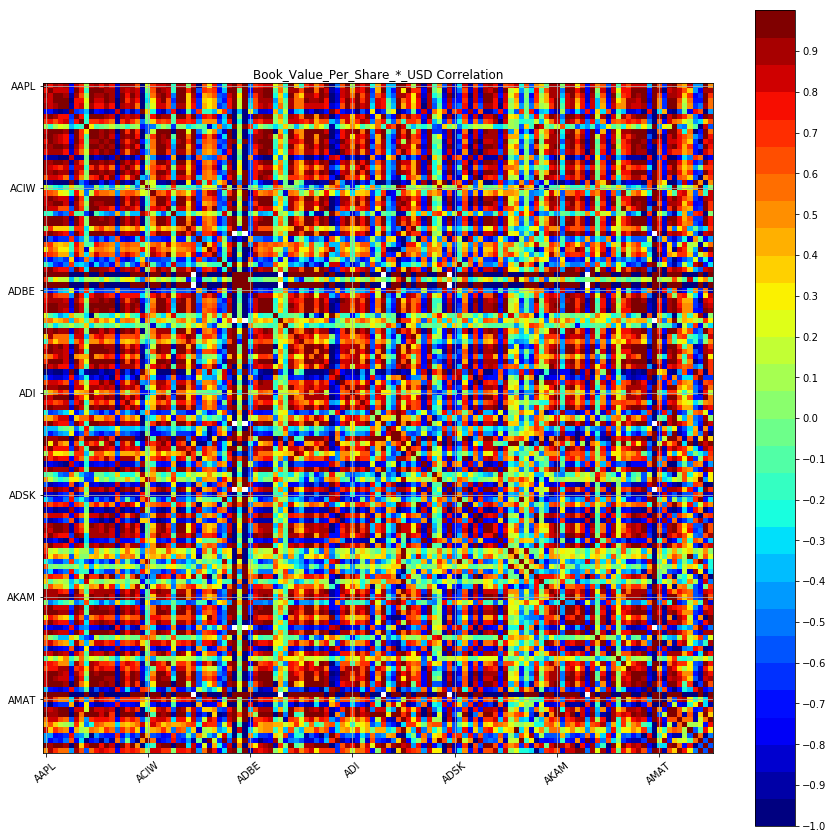

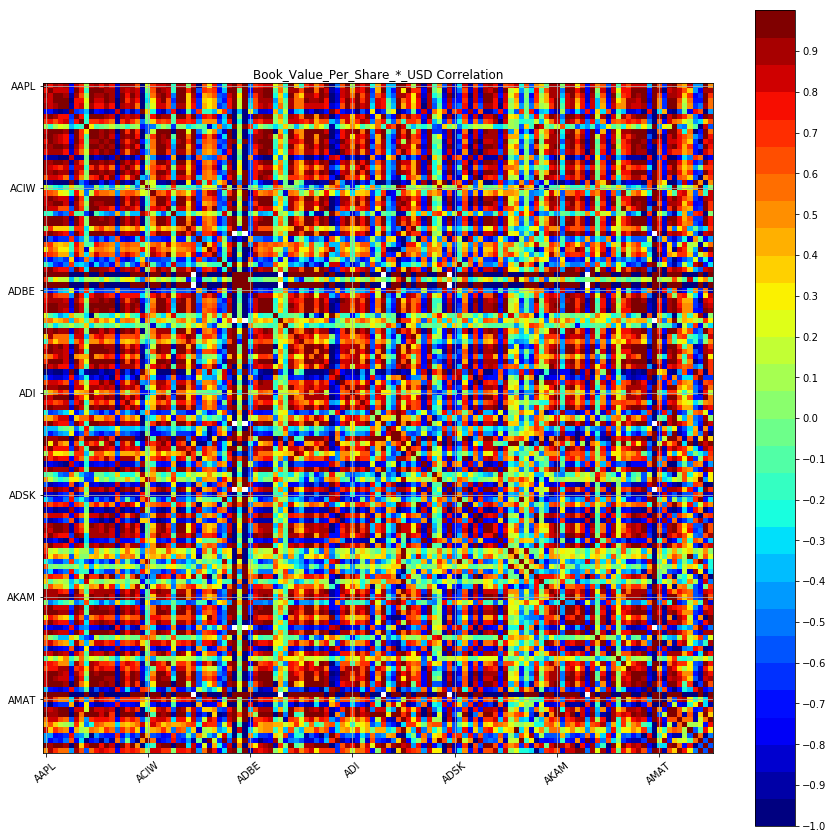

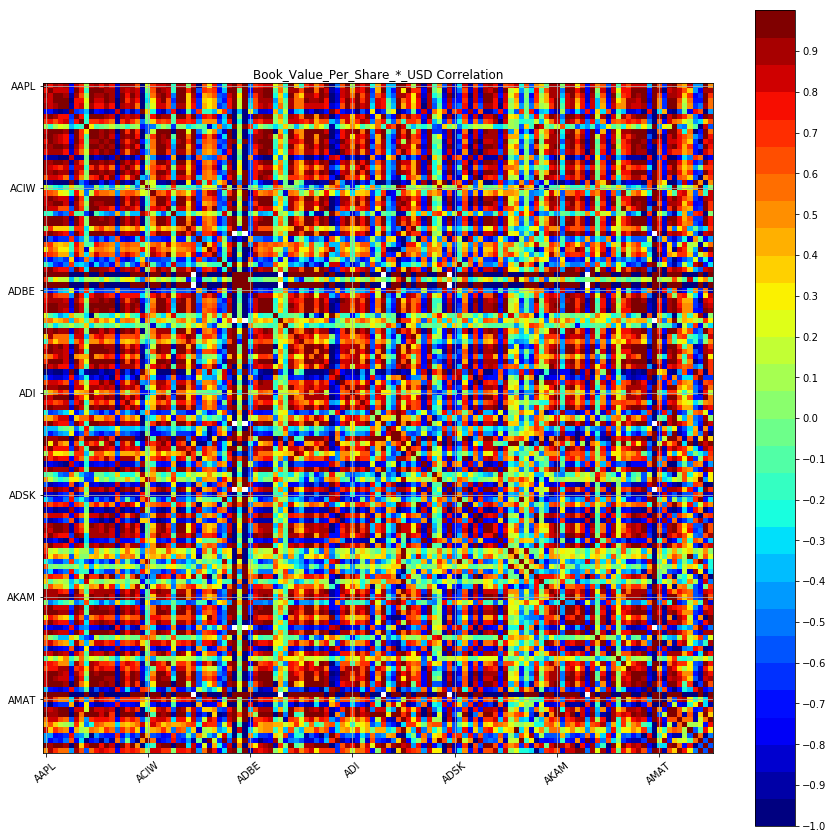

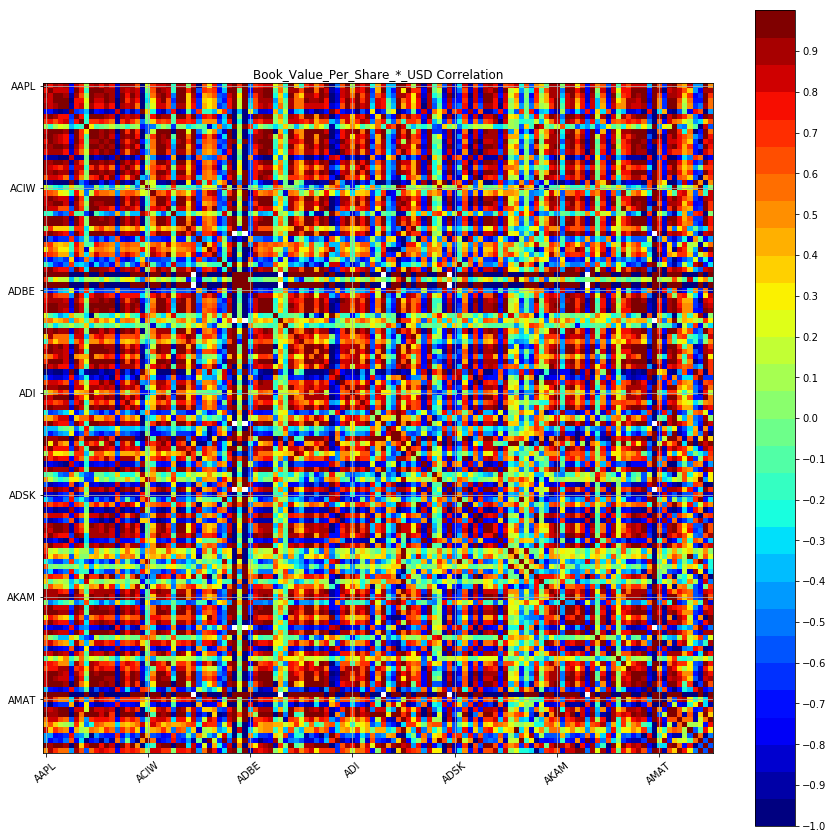

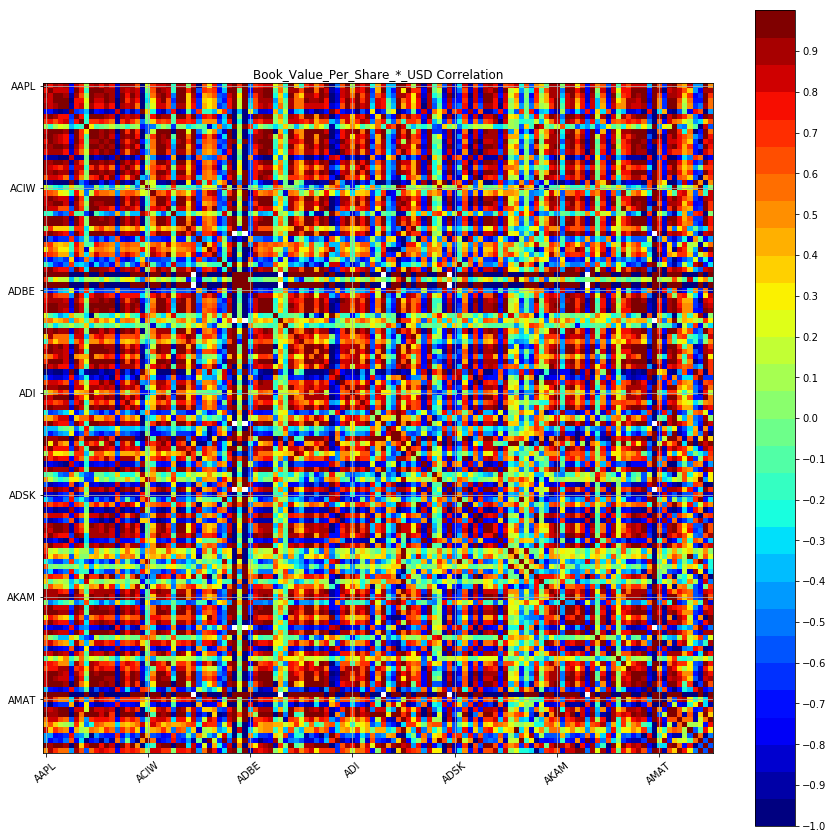

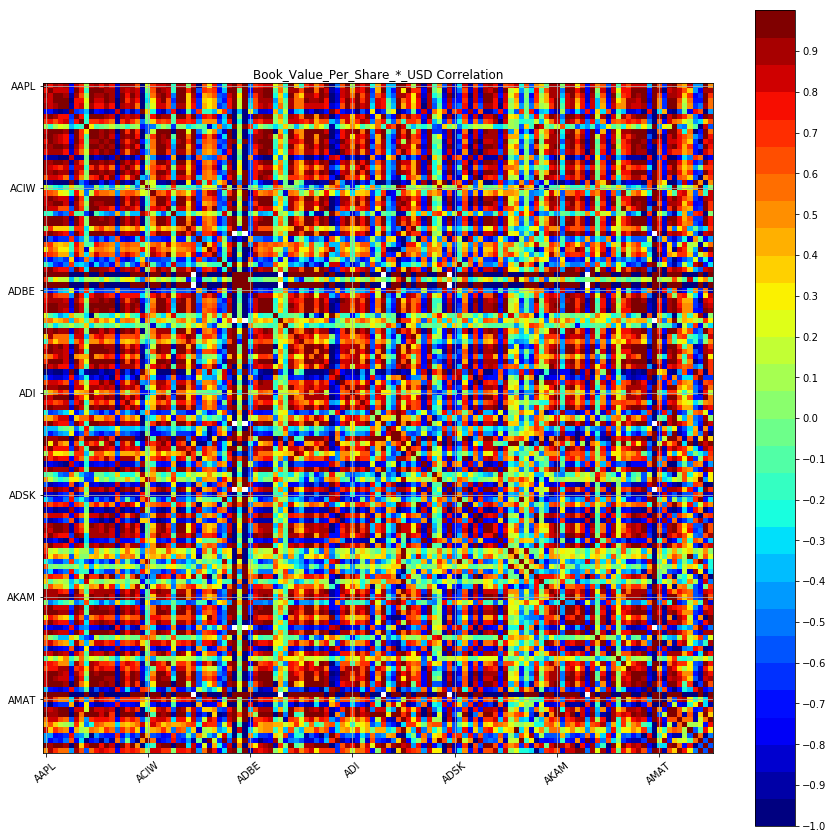

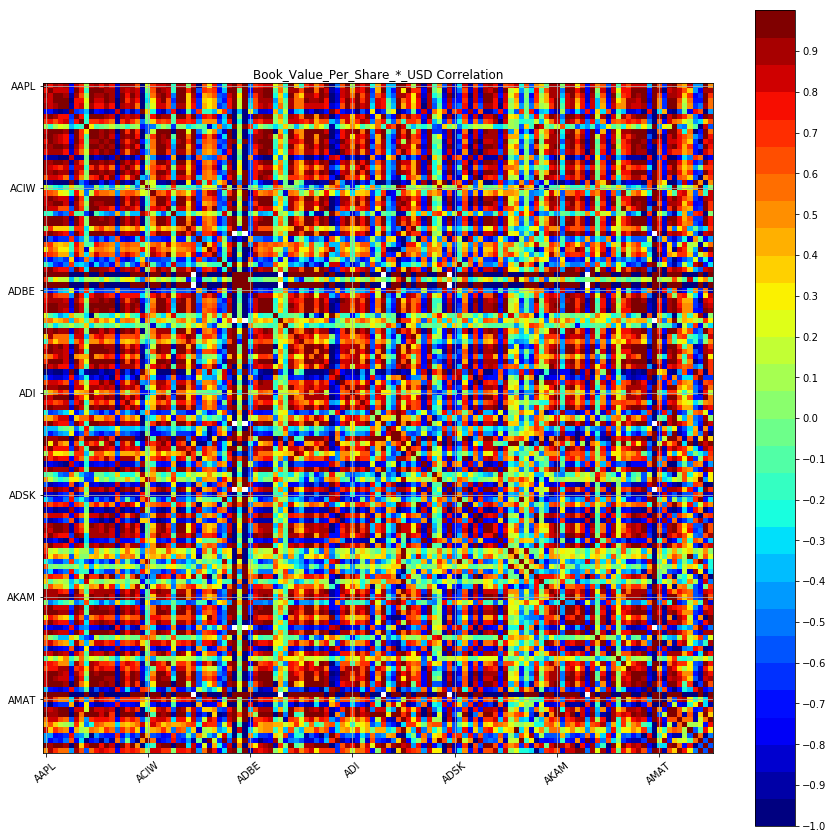

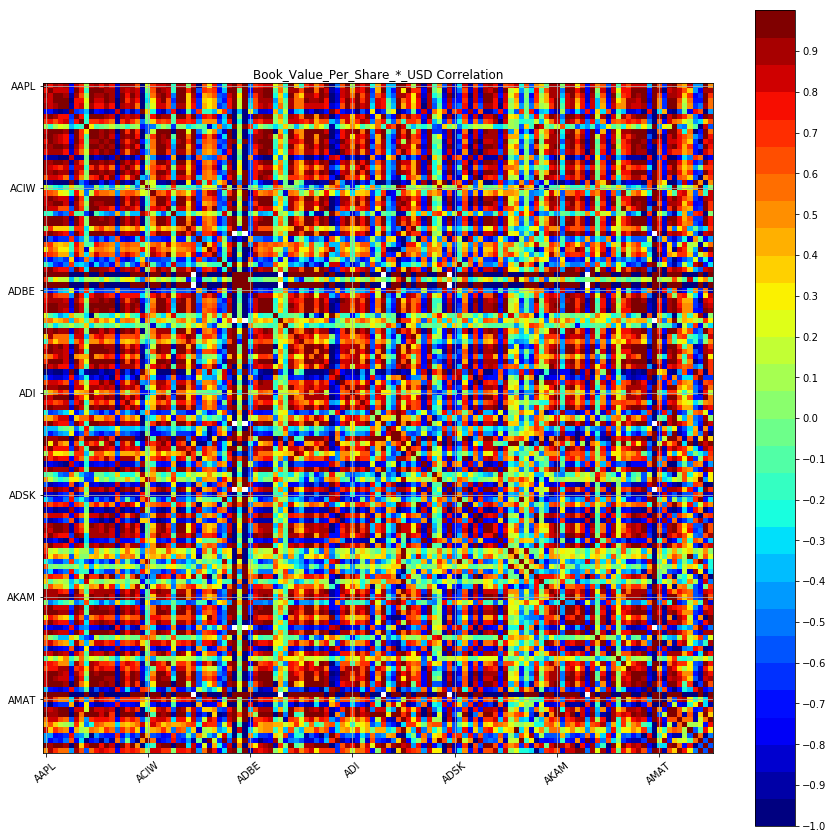

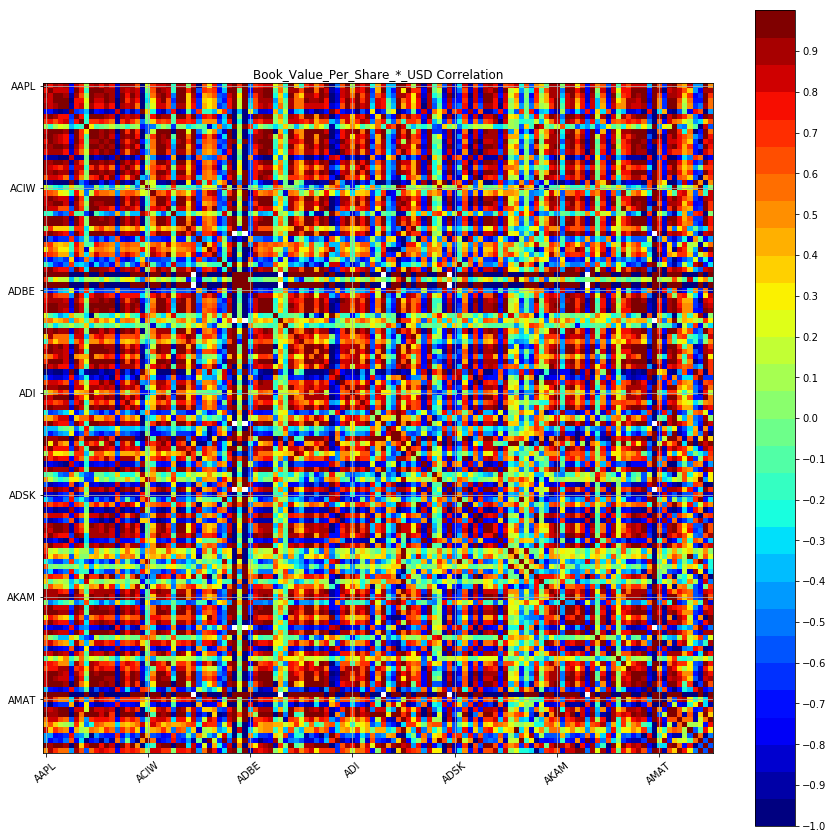

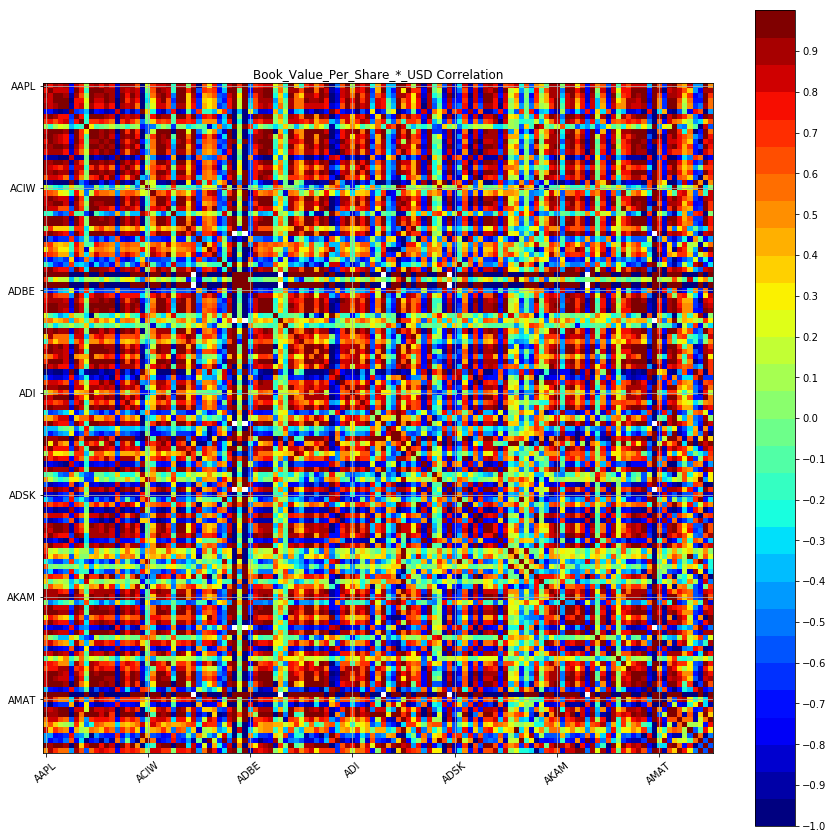

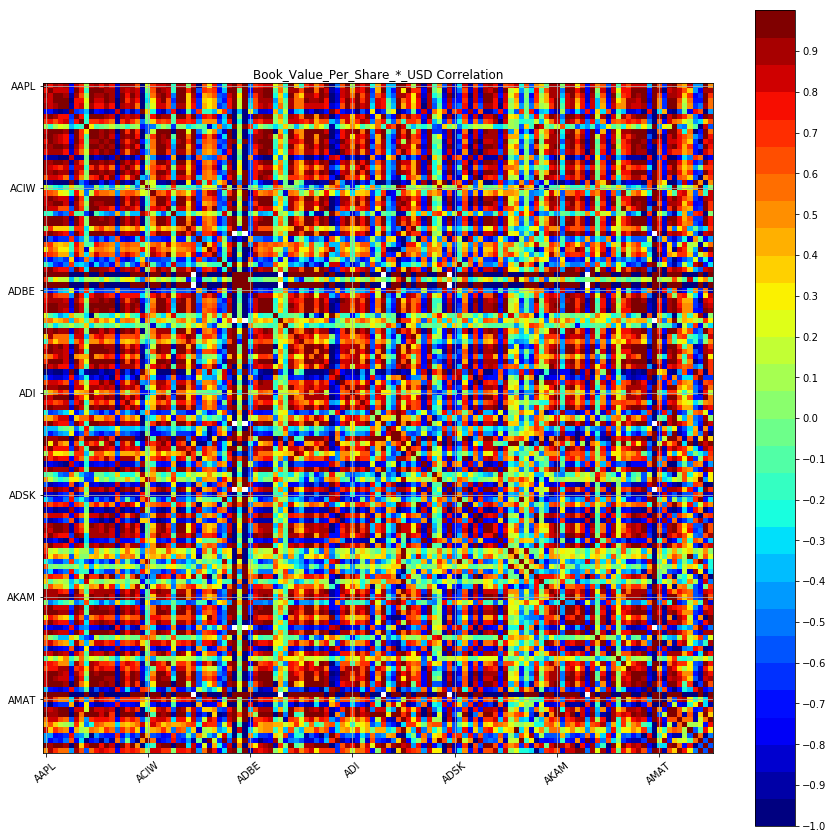

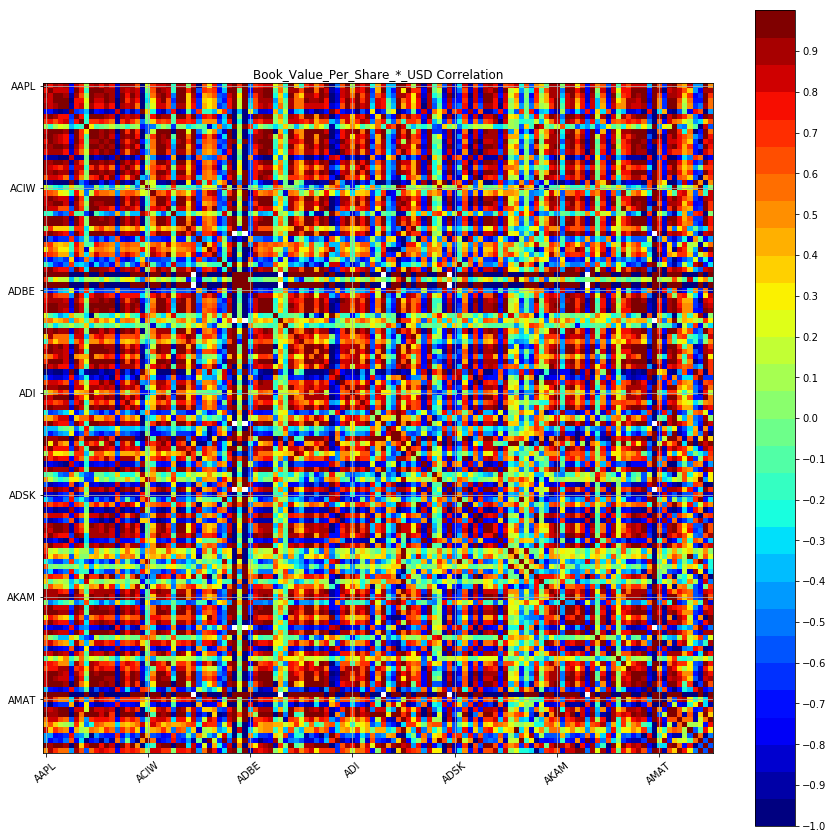

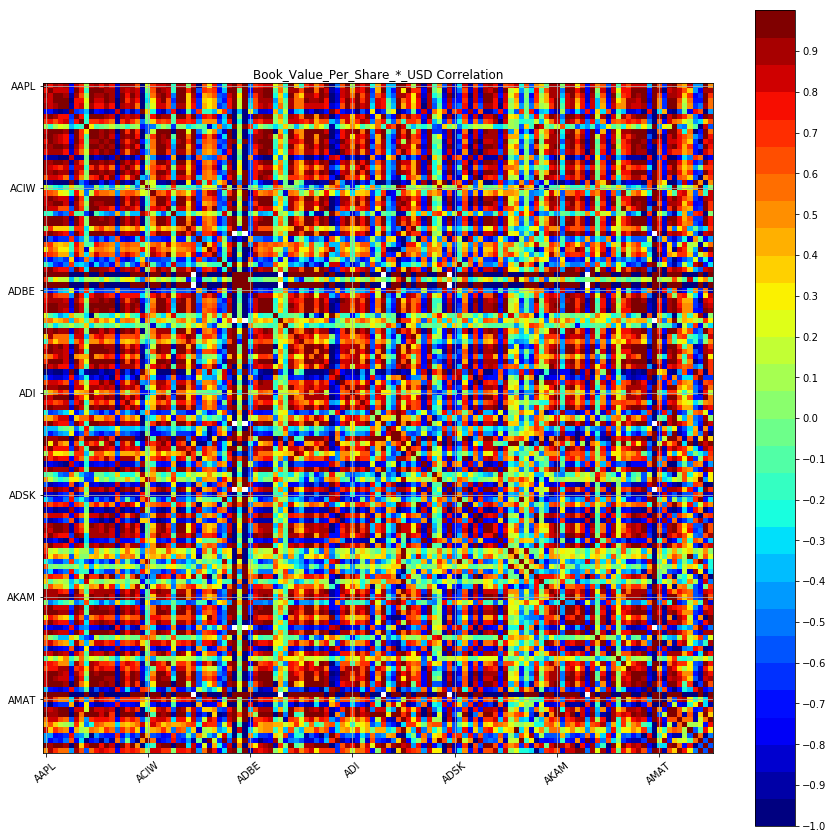

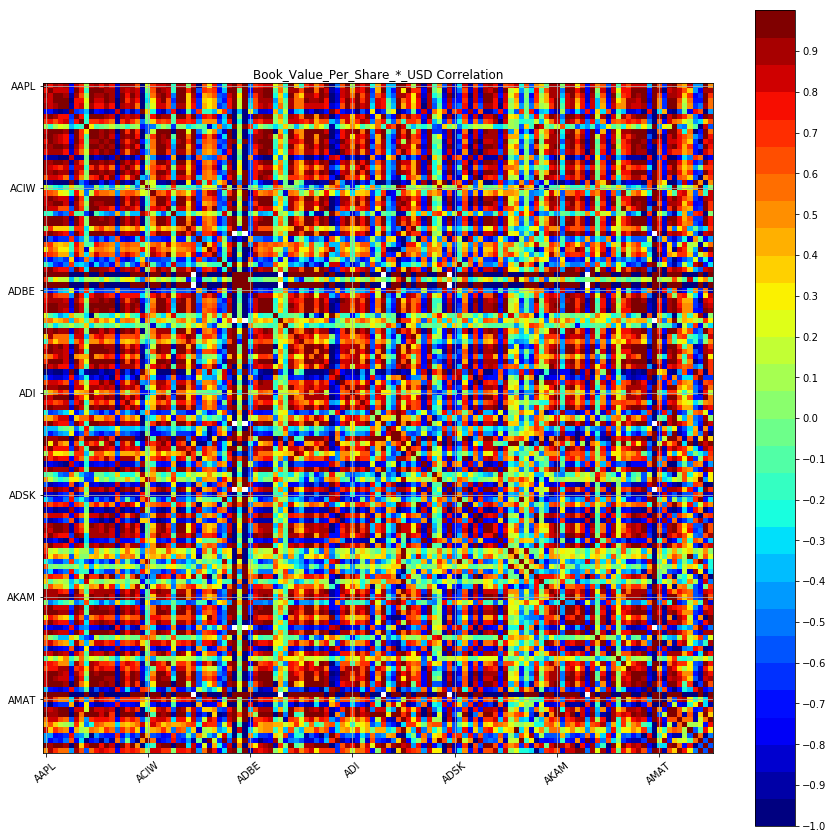

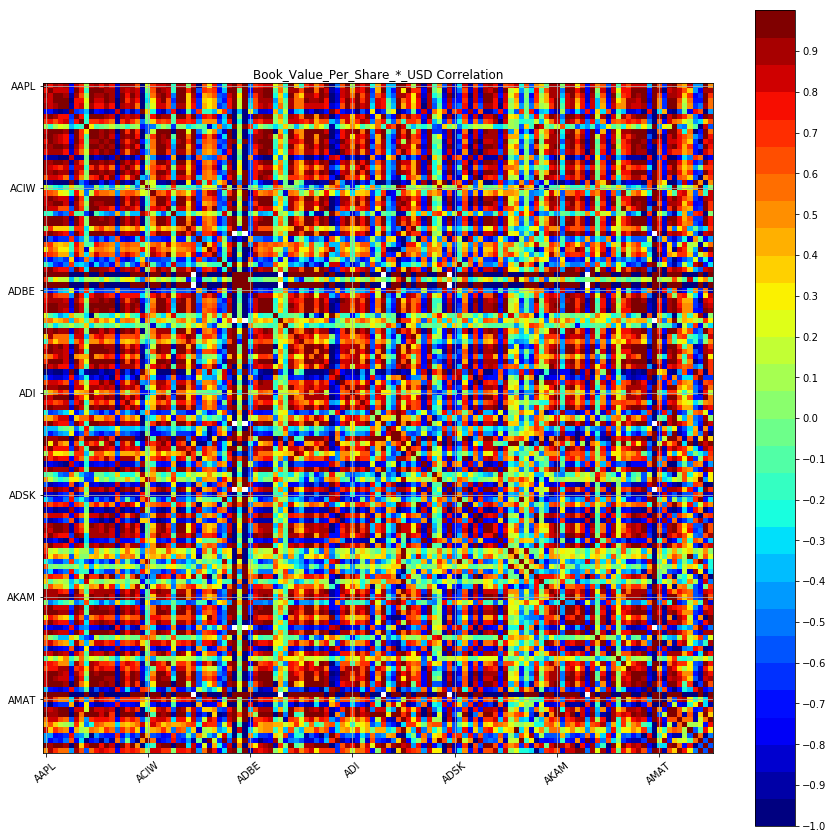

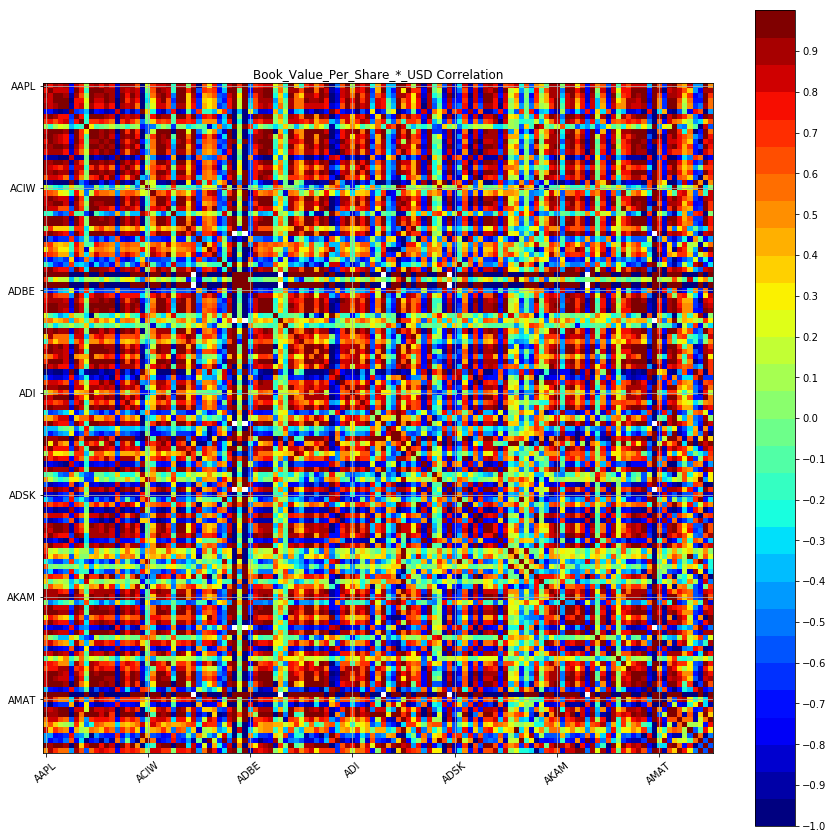

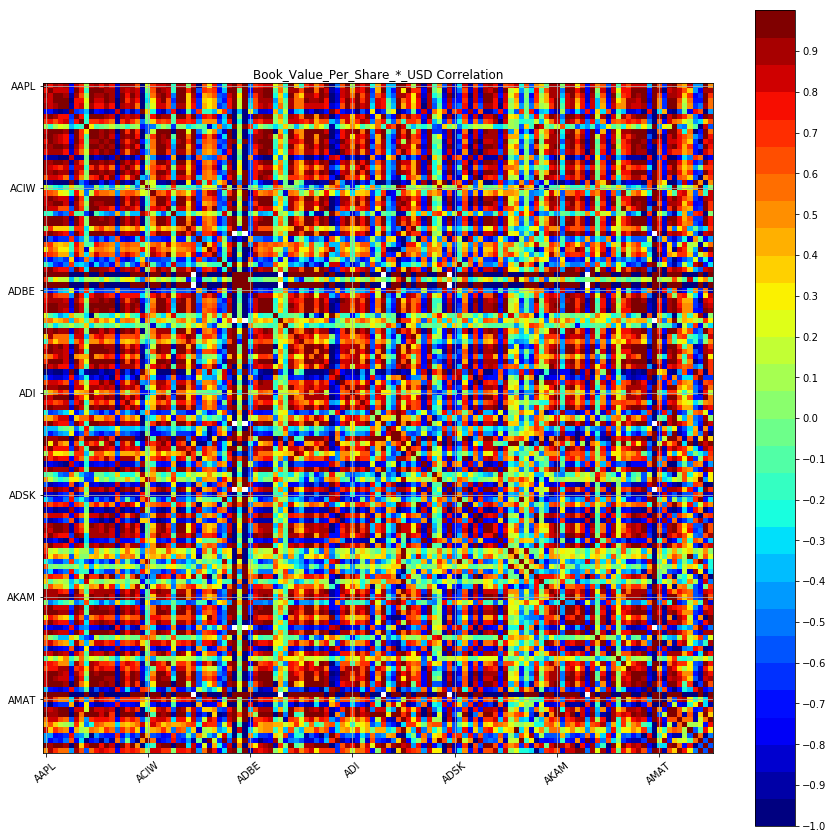

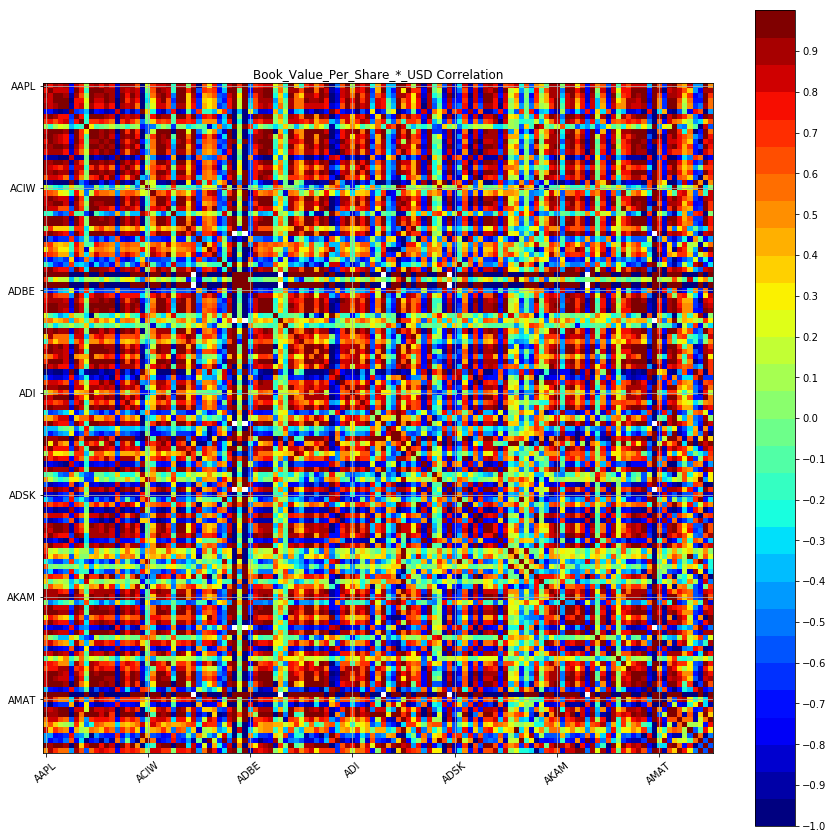

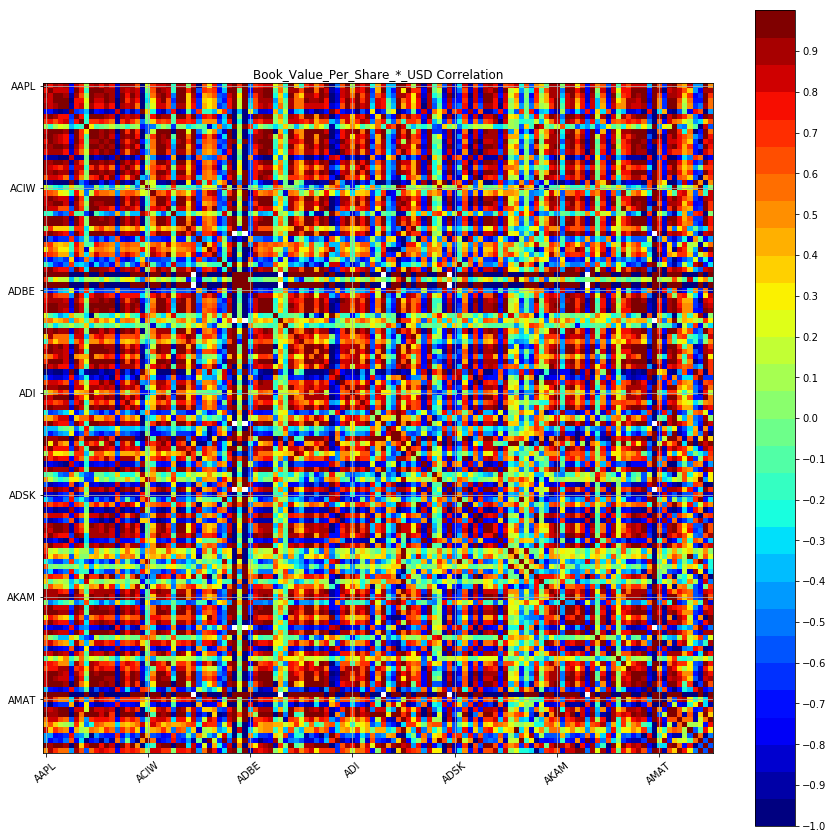

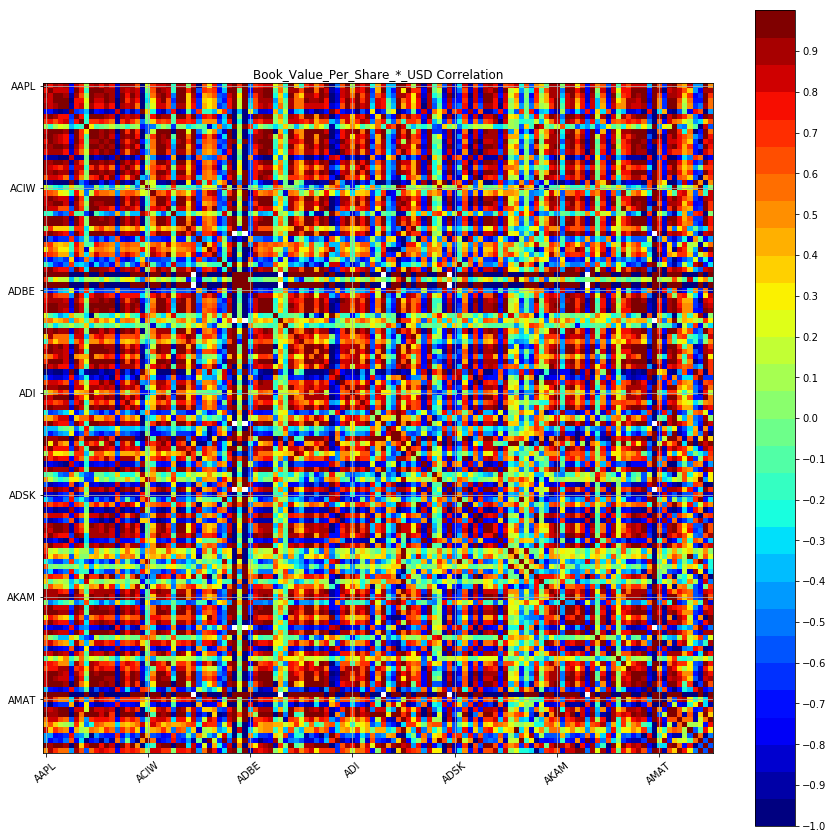

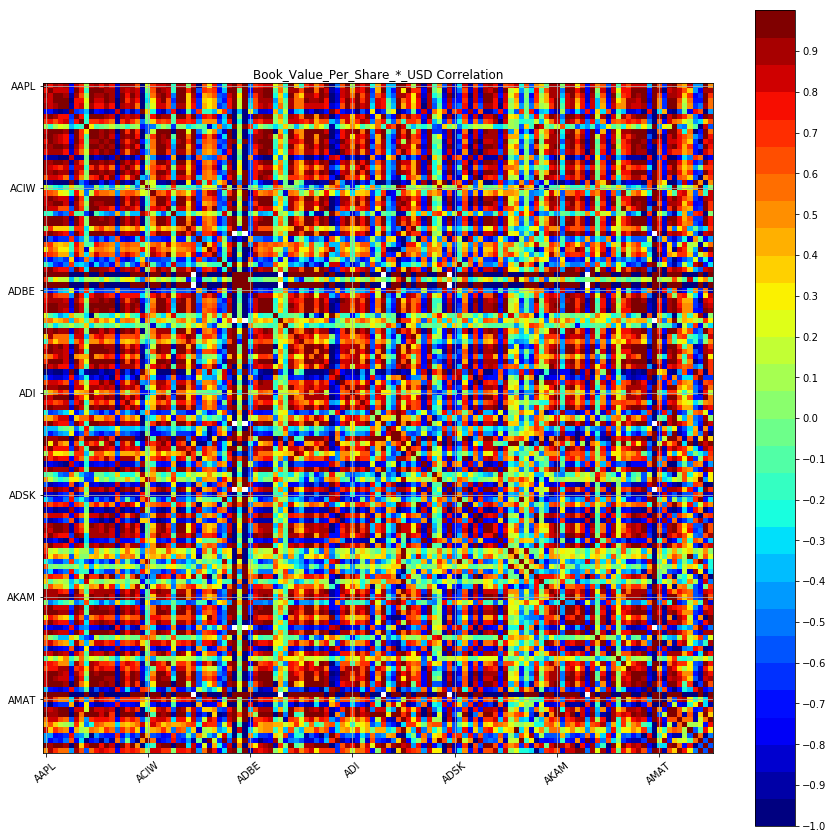

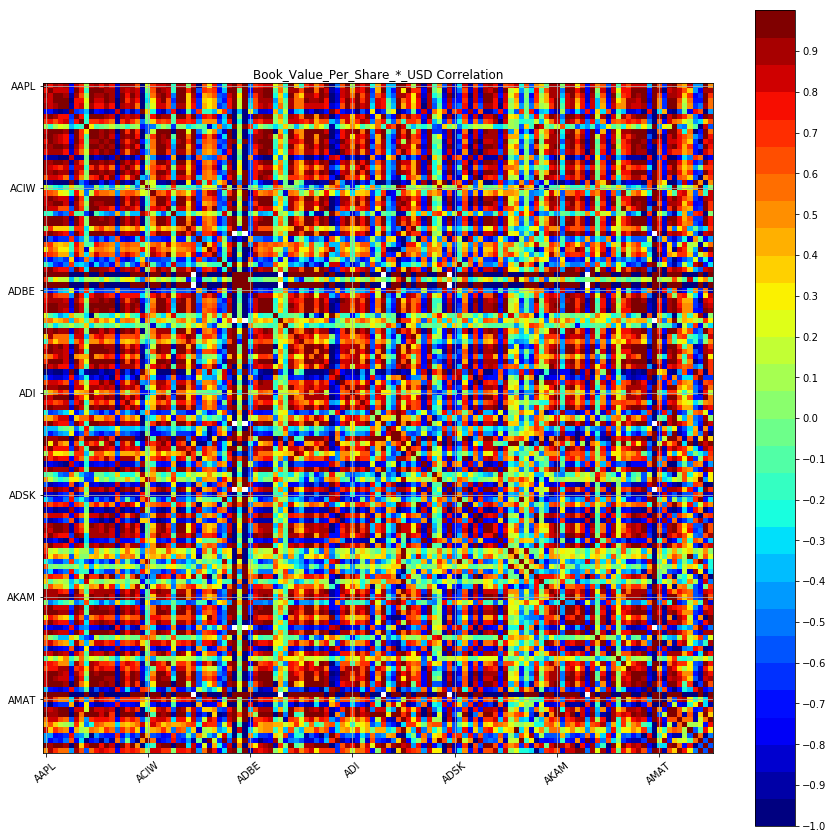

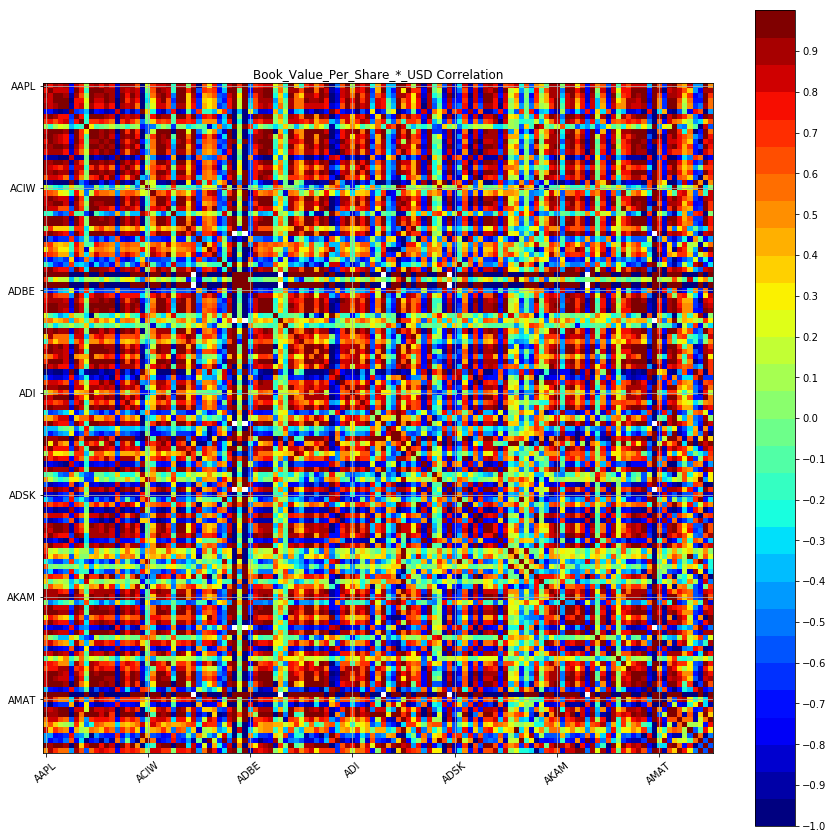

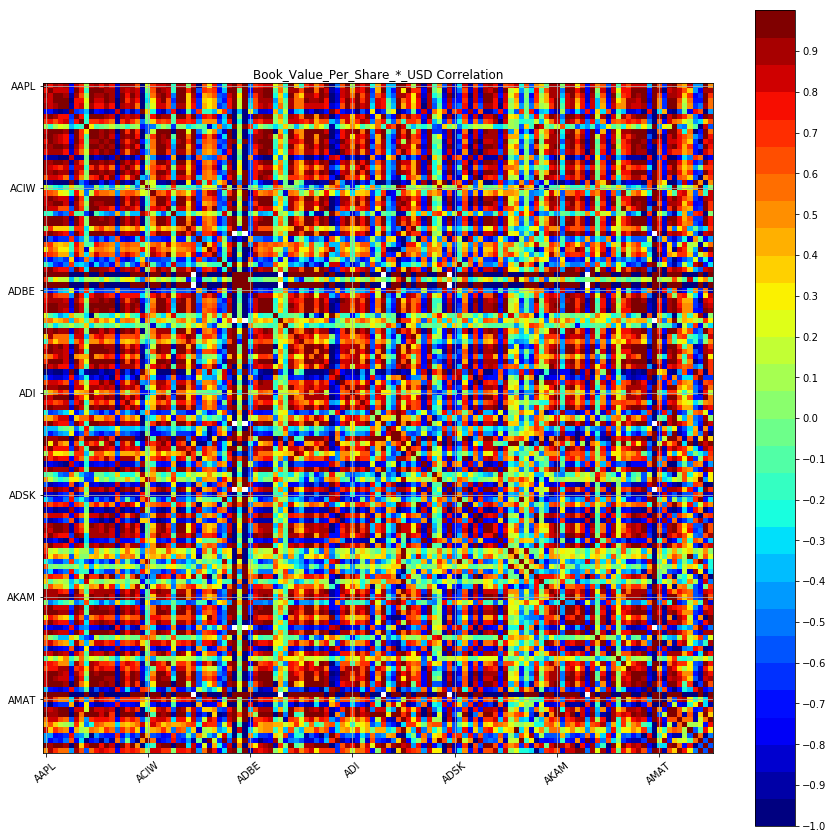

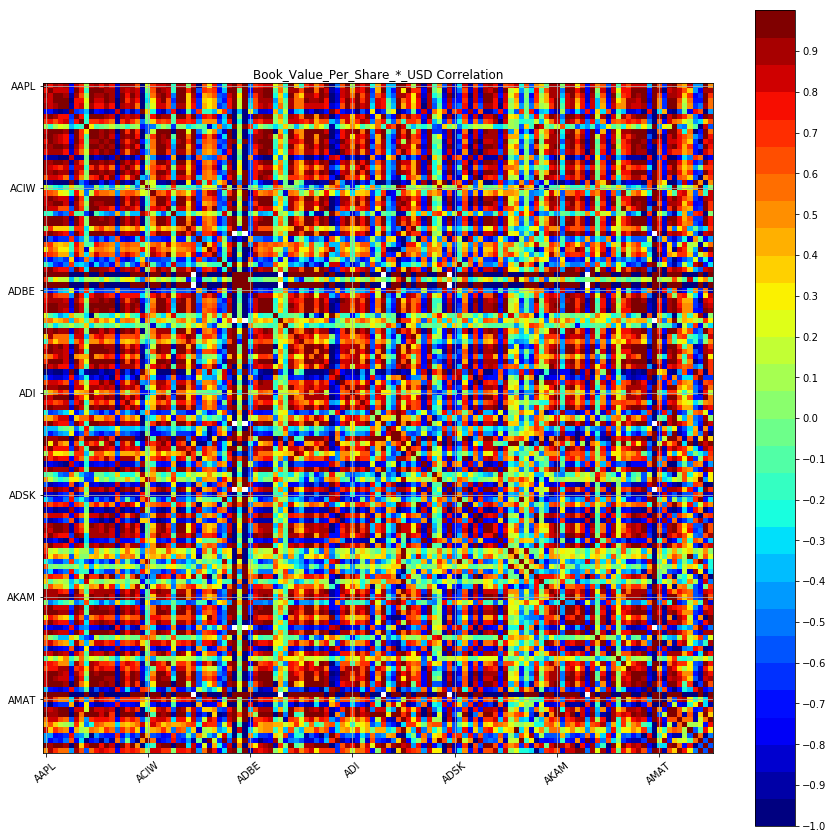

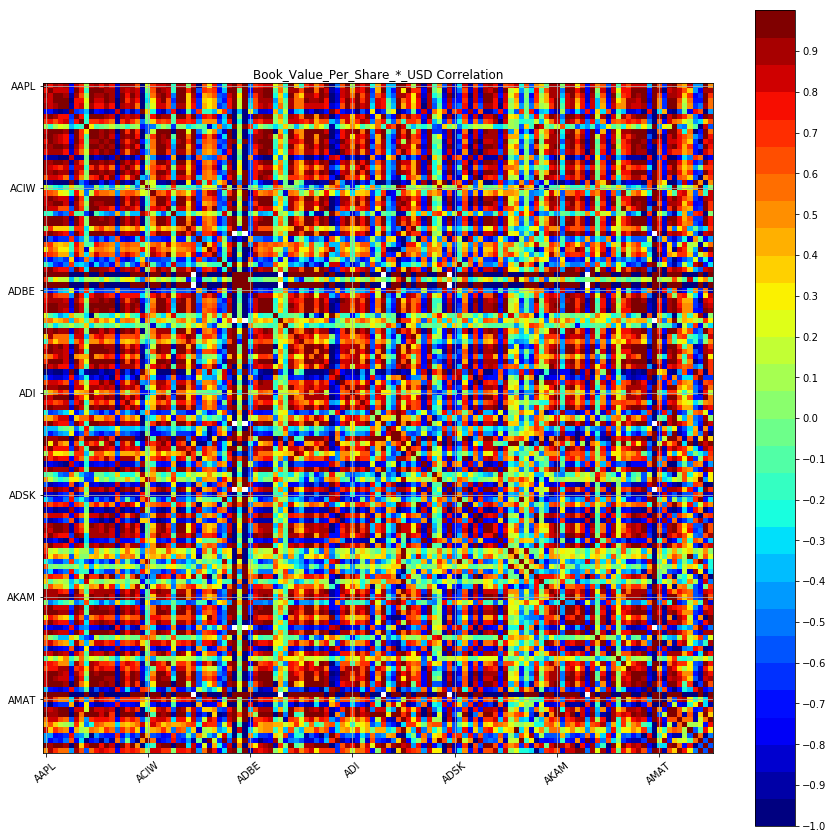

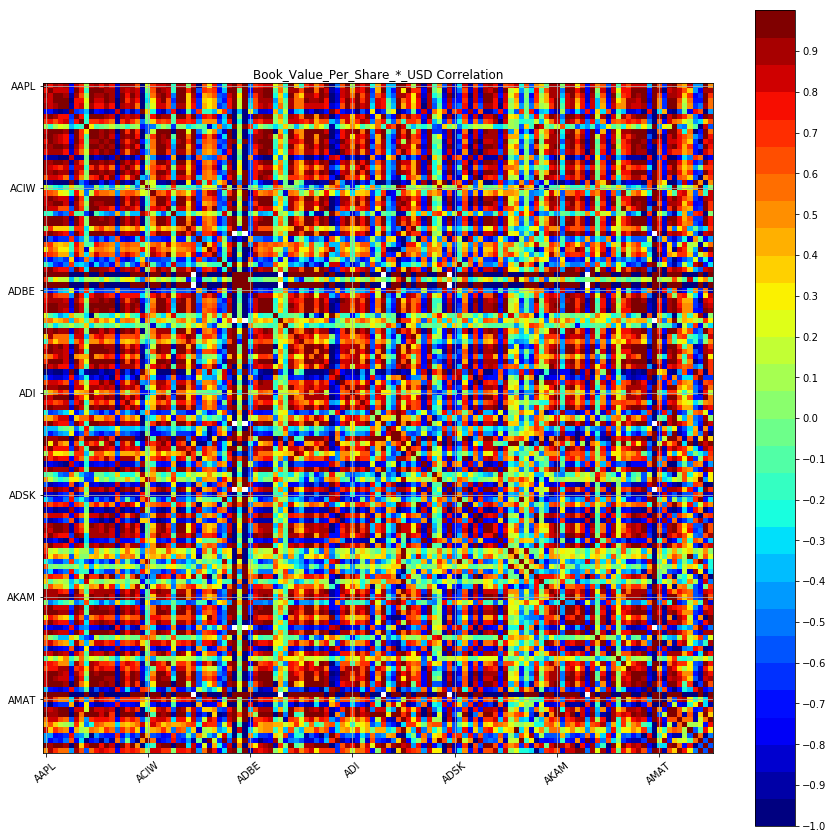

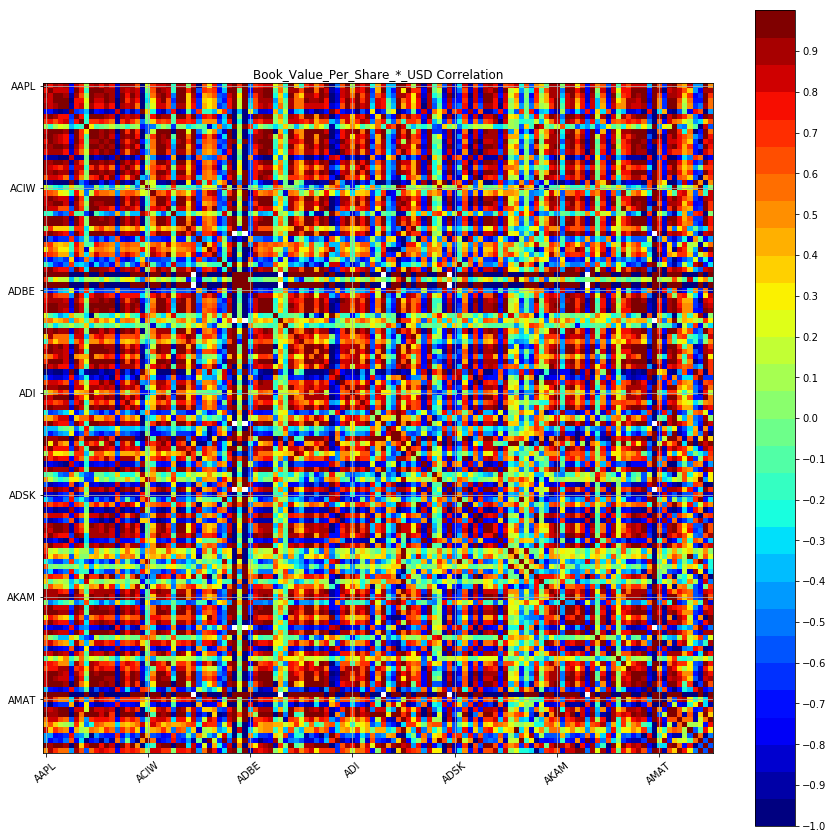

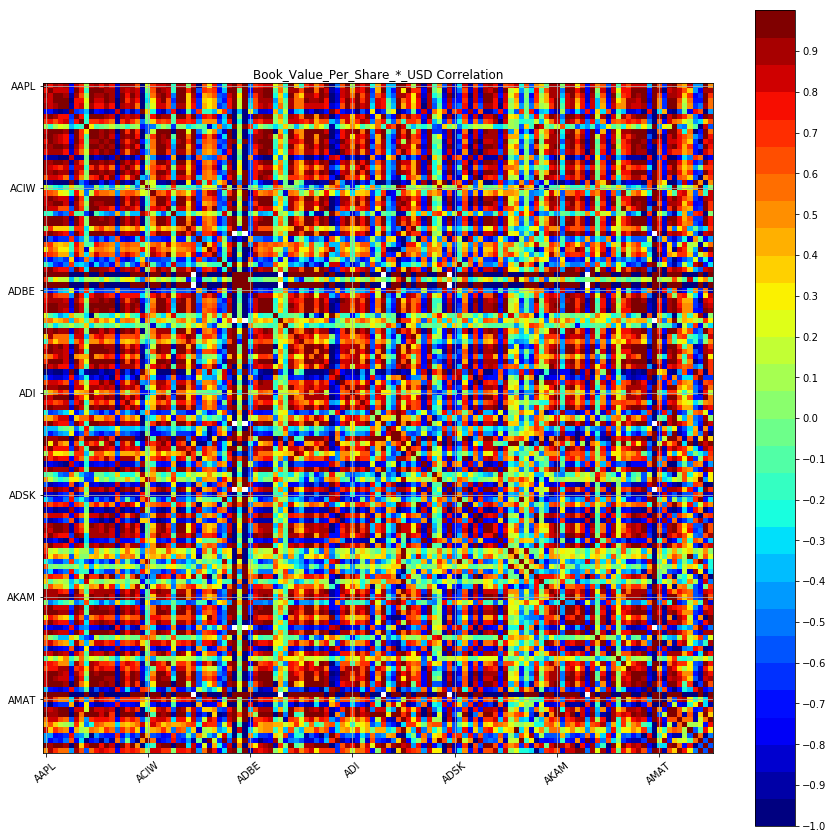

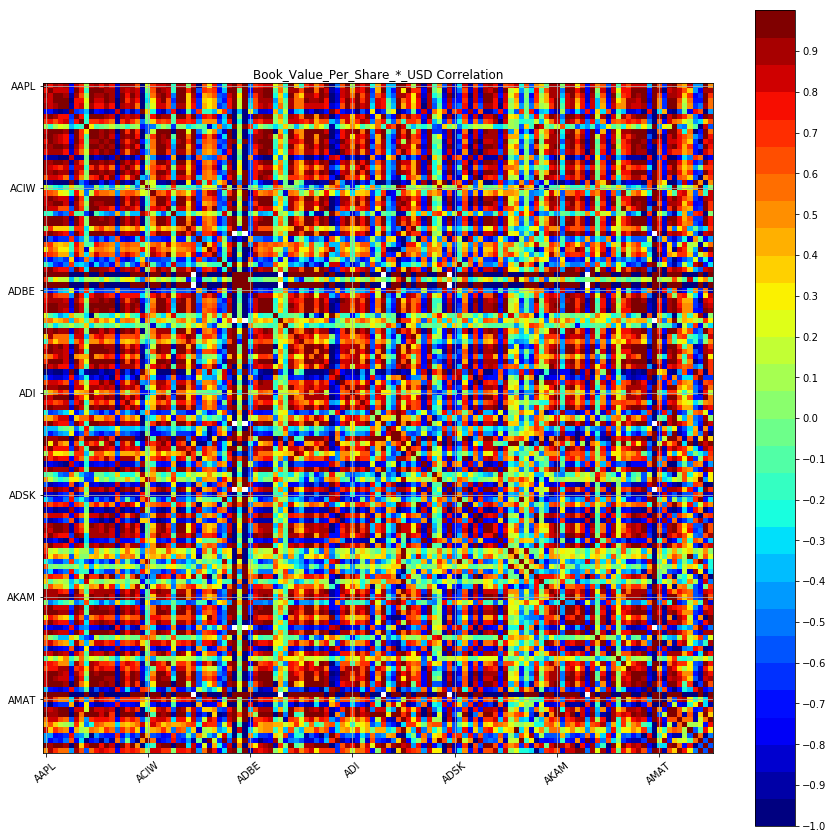

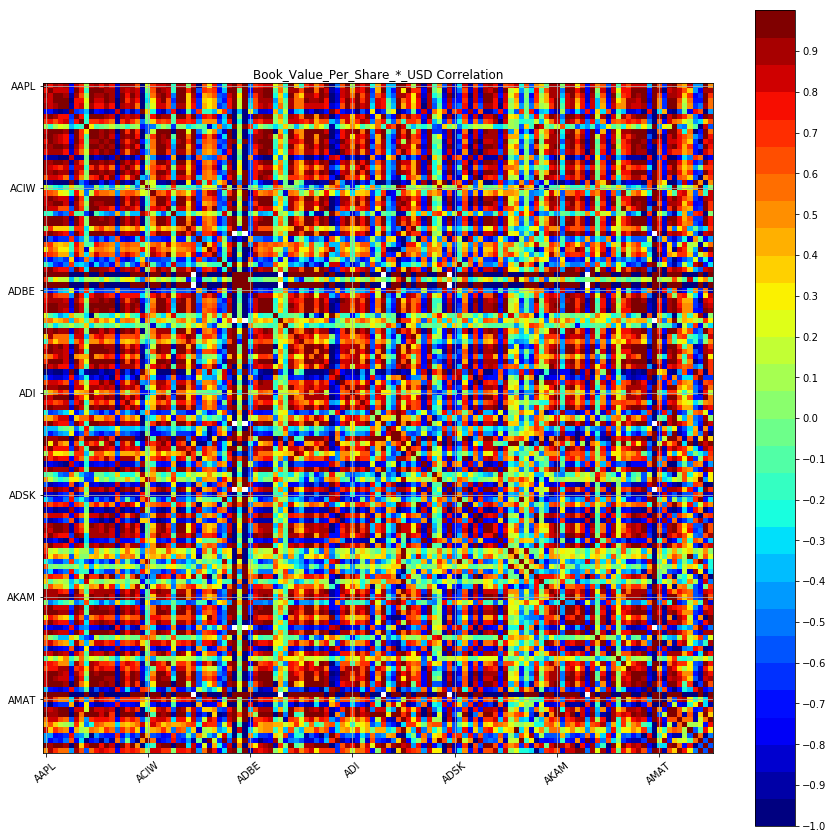

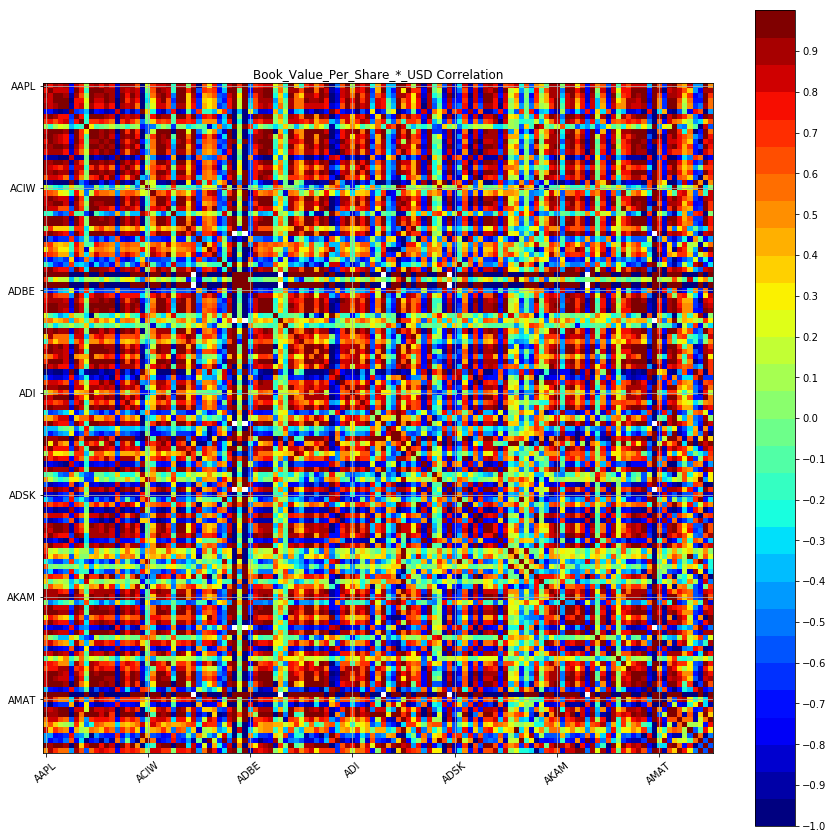

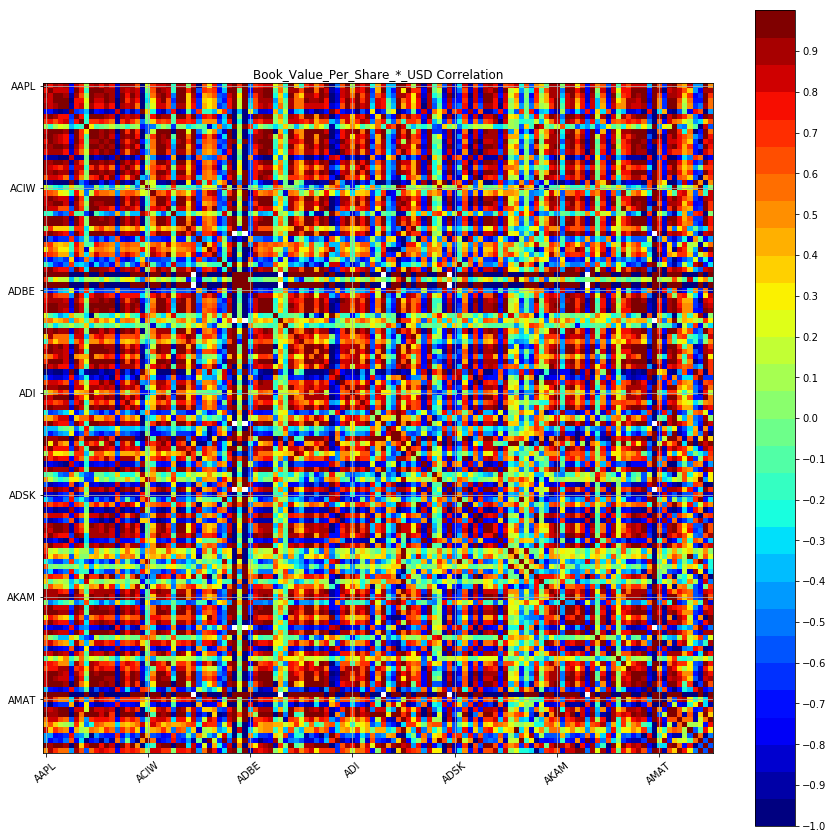

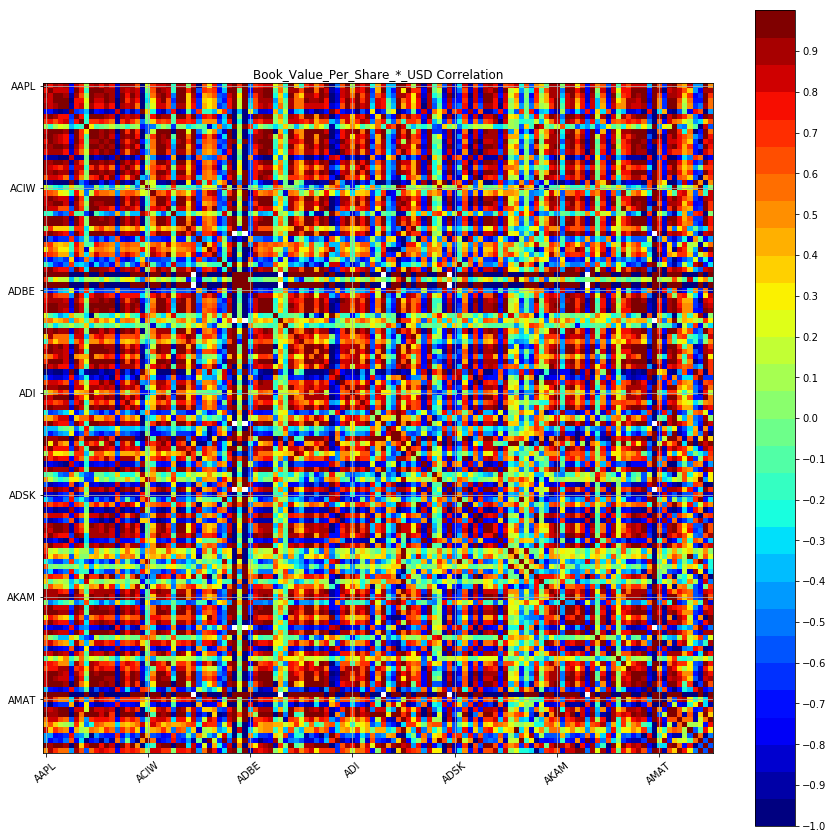

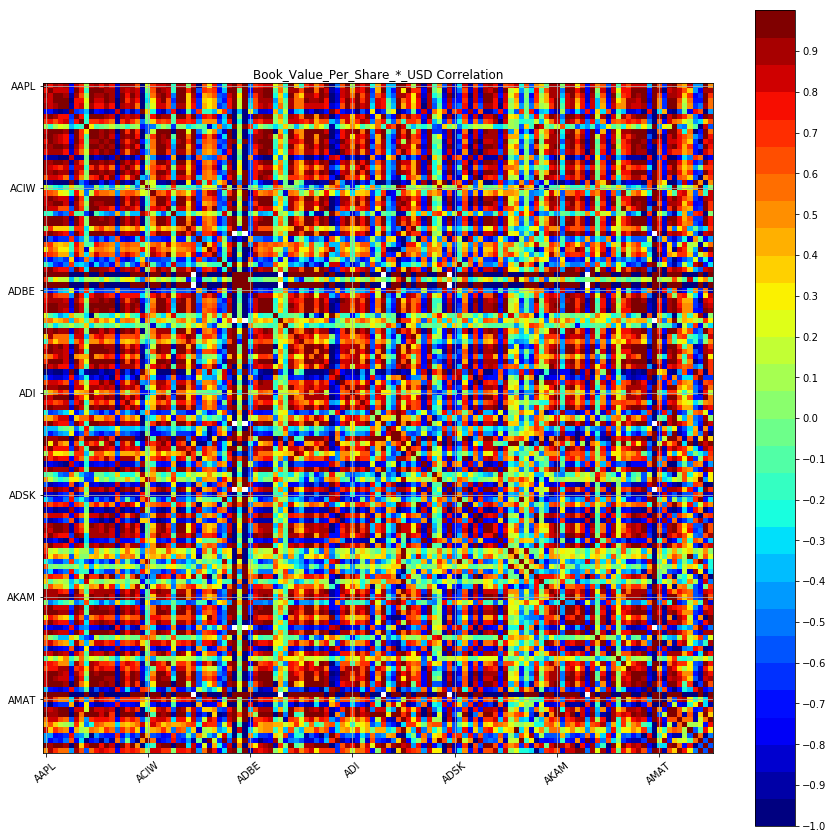

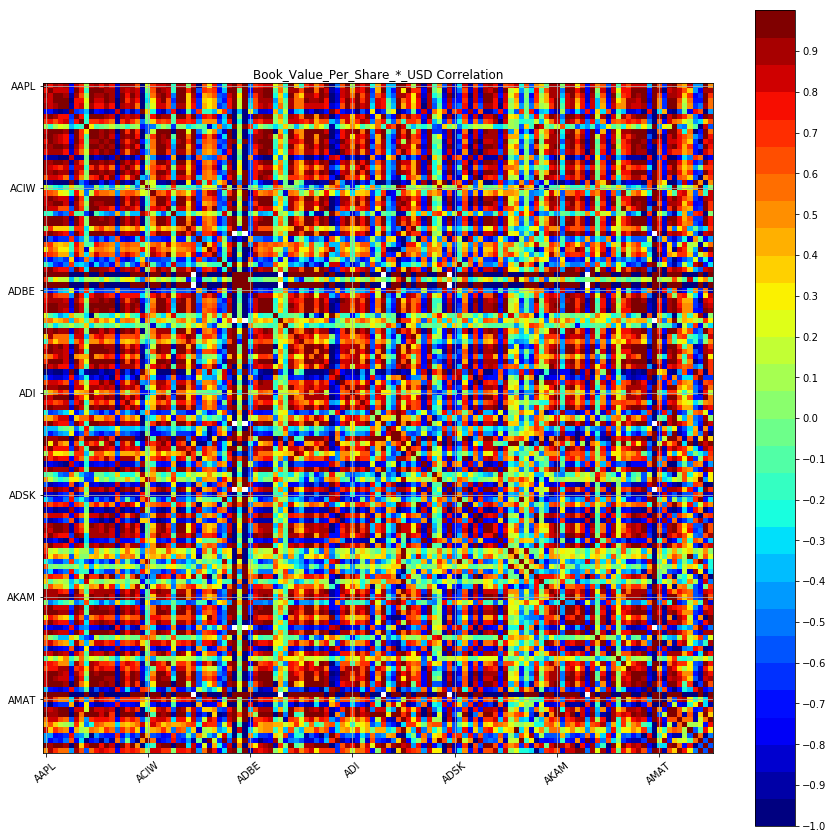

KeyboardInterrupt: 

In [14]:
def correlation_matrix(df,title):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(15,15))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    labels = df.columns
    ax1.grid(True)
    plt.title(title +' Correlation')
    ax1.set_xticklabels(labels,fontsize=10, rotation=40)
    ax1.set_yticklabels(labels,fontsize=10)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    #fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
    fig.colorbar(cax, ticks=[i/10. for i in range(-10,11)])
    plt.show()

for data_type,ticker in pivot.columns:
    correlation_matrix(pivot.xs(data_type,level=0,axis=1),data_type)